# 题目：MLP实现图像多分类（手写数字识别）
## 实验目的与环境

目的

- 基于mnist数据集，建立MLP模型

- 使用模型实现0-9数字的十分类

- 手动实现神经网络正向传播和反向传播算法

- 熟悉交叉熵损失函数的计算方法

In [2]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))
class DenseLayer:
    def __init__(self, input_size, output_size,  activation=sigmoid, derivative=sigmoid_derivative):
        self.weights = np.random.randn(input_size, output_size)
        self.biases = np.zeros(output_size)
        self.output = None
        self.dinputs = None
        self.dweights = None
        self.dbiases = None
        self.activation = activation
        self.derivative = derivative


    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
        return self.activation(self.output)

    def backward(self, dvalues):
        dvalues = self.derivative(self.output) * dvalues
            
            
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0)
        self.dinputs = np.dot(dvalues, self.weights.T)
        return self.dinputs
    
    def update(self,learning_rate,samples):
        self.weights -= learning_rate * self.dweights / samples
        self.biases -= learning_rate * self.dbiases / samples


class LinearNetwork:
    def __init__(self):
        self.layers = []
        self.learning_rate = 0.01
        
    def add_layer(self, layer):
        self.layers.append(layer)

    def forward(self, inputs):
        curr_input = inputs
        for layer in self.layers:
            curr_input =layer.forward(curr_input)
        return curr_input

    def backward(self, dvalues):
        n_samples, n_features = dvalues.shape
        curr_dvalues = dvalues
        for layer in reversed(self.layers):            
            curr_dvalues = layer.backward(curr_dvalues)

    def update(self,n_samples):
        for layer in self.layers:
            layer.update(self.learning_rate, n_samples)

    def train(self, inputs, targets):
        n_samples, n_features = inputs.shape
        output = self.forward(inputs)
        self.backward(output - targets)
        self.update(n_samples)
        loss = np.mean(np.square(output - targets))        
        return loss

    def fit(self, X, y, epochs=1000, batch_size=10):
        for epoch in range(epochs):
            for i in range(0, X.shape[0], batch_size):
                batch_X = X[i:i+batch_size]
                batch_y = y[i:i+batch_size]
                loss = self.train(batch_X, batch_y)
            if epoch % 10 == 0:
                print(f"Epoch {epoch} loss: {loss}")
    
    def predict(self, X):
        return self.forward(X)

In [13]:
class CrossEntropyLayer(DenseLayer):
    def __init__(self, input_size, output_size,):
        super(CrossEntropyLayer, self).__init__(input_size, output_size)
    
   
    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0)
        self.dinputs = np.dot(dvalues, self.weights.T)
        return self.dinputs

In [3]:
#load the dataset
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(type(X_train),X_train.shape)


<class 'numpy.ndarray'> (60000, 28, 28)


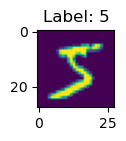

In [4]:
# visualize the data
import matplotlib.pyplot as plt
import numpy as np

img1 = X_train[0]
fig1 = plt.figure(figsize=(1, 1))
plt.imshow(img1)
plt.title('Label: %d' % y_train[0])
plt.show()

In [5]:
from tensorflow import keras

num_classes = 10
input_shape = (28, 28, 1)
feature_size = img1.shape[0] * img1.shape[1] 
print("feature_size", feature_size)

# format input data
X_train_normal = X_train.reshape(X_train.shape[0], feature_size).astype('float32') / 255.0
X_test_normal = X_test.reshape(X_test.shape[0], feature_size).astype('float32') / 255.0

# convert class vectors to binary class matrices
y_train_format = keras.utils.to_categorical(y_train, num_classes)
y_test_format = keras.utils.to_categorical(y_test, num_classes)

print("X_train_normal shape:", X_train_normal.shape)
print(X_train_normal[1])

feature_size 784
X_train_normal shape: (60000, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0. 

In [14]:
model = LinearNetwork()

model.add_layer(DenseLayer(input_size=feature_size,output_size=30))
model.add_layer(DenseLayer(input_size=30,output_size=30))
model.add_layer(CrossEntropyLayer(input_size=30,output_size=10))
model.fit(X_train_normal,y_train_format,epochs=200,batch_size=32)

Epoch 0 loss: 0.09130408387176094
Epoch 10 loss: 0.04638768483801101
Epoch 20 loss: 0.023749183317179103
Epoch 30 loss: 0.01521374708835577
Epoch 40 loss: 0.01087518426123287
Epoch 50 loss: 0.008441181517359665
Epoch 60 loss: 0.007104410573329753
Epoch 70 loss: 0.006325879319258014
Epoch 80 loss: 0.005631147267267926
Epoch 90 loss: 0.004911430751095106
Epoch 100 loss: 0.004222060189826151
Epoch 110 loss: 0.003615345786850973
Epoch 120 loss: 0.0031609943854678966
Epoch 130 loss: 0.0028562190334511777
Epoch 140 loss: 0.0026483255294735284
Epoch 150 loss: 0.0024957220181192805
Epoch 160 loss: 0.002377127447940378
Epoch 170 loss: 0.002283504216956867
Epoch 180 loss: 0.0022084952276328626
Epoch 190 loss: 0.0021455272941701443


准确率: 0.9284


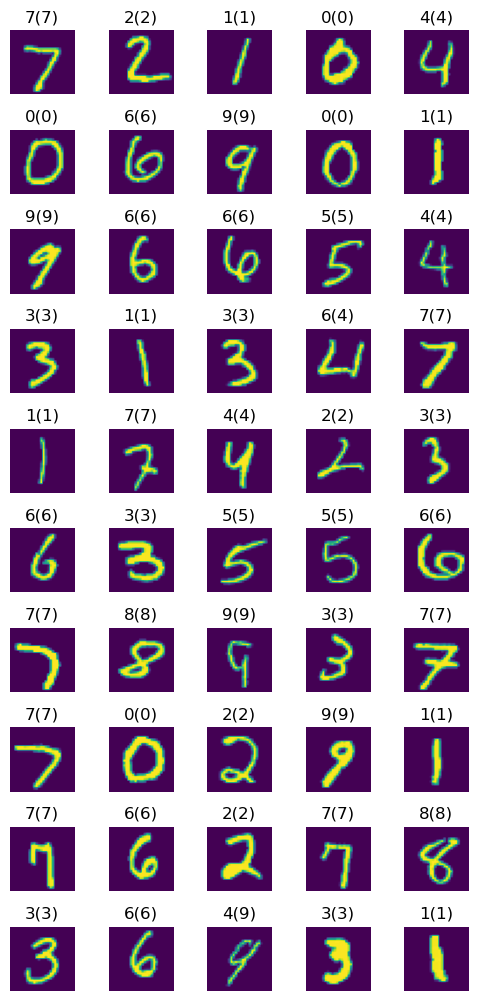

In [15]:
y_test_predict = model.predict(X_test_normal)
y_test_predict = np.argmax(y_test_predict, axis=1)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_test_predict)
print("准确率:", accuracy)

# 绘制预测结果
fig1 = plt.figure(figsize=(10,40))
for i in range(10):
    for j in range(5):
        index = i*10+j
        img = X_test[index]
        value = str(y_test_predict[index]) + "(" + str(y_test[index]) + ")"
        plt.subplot(40,10,index+1)
        plt.title(value)
        plt.imshow(img)
        plt.axis('off')

plt.tight_layout()
plt.show()

准确率: 0.9416666666666667


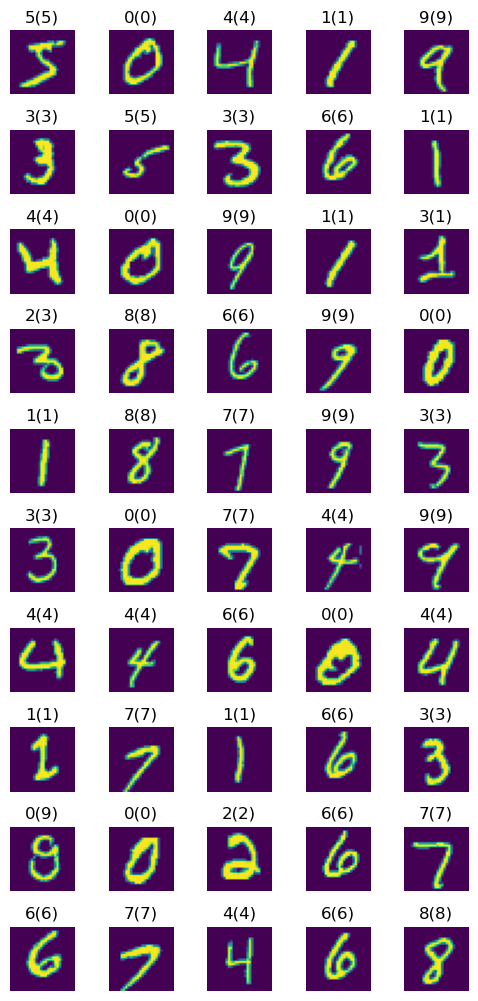

In [16]:
y_train_predict = model.predict(X_train_normal)
y_train_predict = np.argmax(y_train_predict, axis=1)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_train_predict)
print("准确率:", accuracy)

# 绘制预测结果
fig1 = plt.figure(figsize=(10,40))
for i in range(10):
    for j in range(5):
        index = i*10+j
        img = X_train[index]
        value = str(y_train_predict[index]) + "(" + str(y_train[index]) + ")"
        plt.subplot(40,10,index+1)
        plt.title(value)
        plt.imshow(img)
        plt.axis('off')
plt.tight_layout()
plt.show()